In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
master_datafile = pd.read_csv("/Users/jenniferwu/Documents/NBA_Social_Influence/final_master_data_file.csv")


In [7]:
master_datafile.drop(columns=['Unnamed: 0'], inplace=True)

In [9]:
print(master_datafile.shape)
master_datafile.head()

(428, 41)


,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,SALARY,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,26500000.0,OKC,81,34.6,6.74,-0.47,6.27,17.34,2130.5,559.0
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,26500000.0,HOU,81,36.4,6.38,-1.57,4.81,15.54,969.0,321.5
2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,22116750.0,NO,75,36.1,0.45,3.90,4.35,12.81,368.0,104.0
3,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,1.7,...,NaN,TOR,74,35.4,2.21,-2.04,0.17,5.46,0.0,186.0
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,16957900.0,NO/SAC,72,34.2,3.56,0.64,4.20,11.26,102.0,91.5


In [10]:
master_datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 41 columns):
Rk                        428 non-null int64
PLAYER                    428 non-null object
POSITION                  428 non-null object
AGE                       428 non-null int64
MP                        428 non-null float64
FG                        428 non-null float64
FGA                       428 non-null float64
FG%                       428 non-null float64
3P                        428 non-null float64
3PA                       428 non-null float64
3P%                       399 non-null float64
2P                        428 non-null float64
2PA                       428 non-null float64
2P%                       428 non-null float64
eFG%                      428 non-null float64
FT                        428 non-null float64
FTA                       428 non-null float64
FT%                       421 non-null float64
ORB                       428 non-null float64
DRB     

In [11]:
master_datafile_na_omit = master_datafile.dropna()
master_datafile_na_omit.shape

(228, 41)

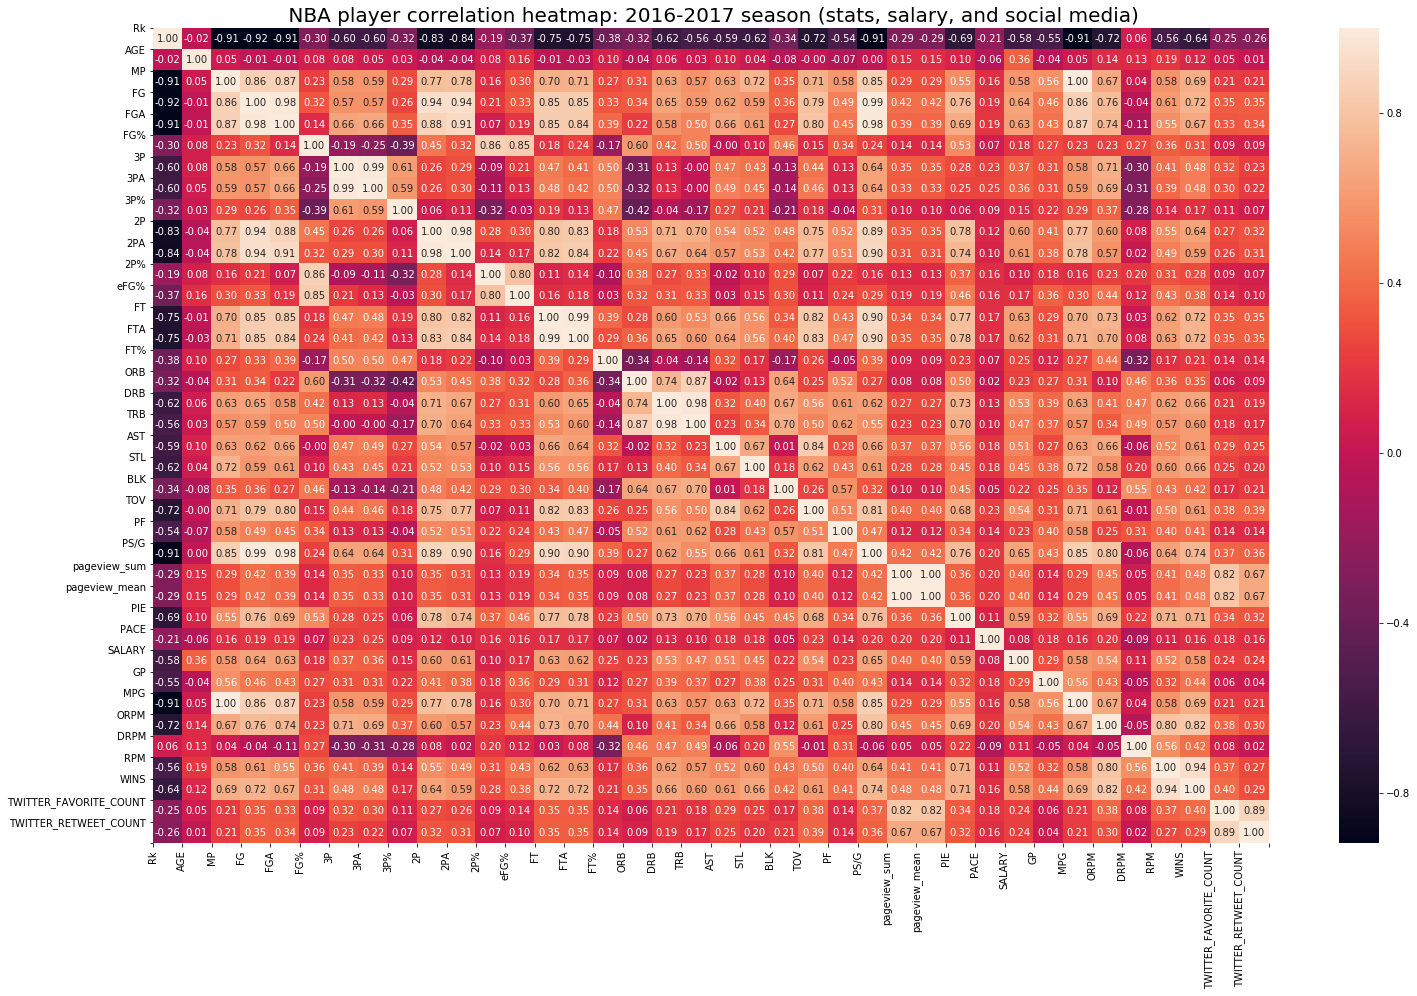

In [14]:
corr = master_datafile_na_omit.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(25, 15))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)+1), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)+1), corr.columns)
plt.title(" NBA player correlation heatmap: 2016-2017 season (stats, salary, and social media)", size = 20)
#show plot
plt.show()